importing library

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score , confusion_matrix

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isnull(text):  # Handle missing values
        return ""

    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]  # Remove stopwords & lemmatize
    return " ".join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


importing test data and training data

In [ ]:
train_data = pd.read_csv('train_data.txt', delimiter=':::', engine = 'python', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
test_data = pd.read_csv('test_data.txt', delimiter=':::', engine = 'python', names=['ID', 'TITLE',  'DESCRIPTION'])

In [ ]:
# Extracting features and labels for training and testing
X_train = train_data['DESCRIPTION'].apply(preprocess_text)  # Features: Text descriptions
y_train = train_data['GENRE']       # Labels: Genres



In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

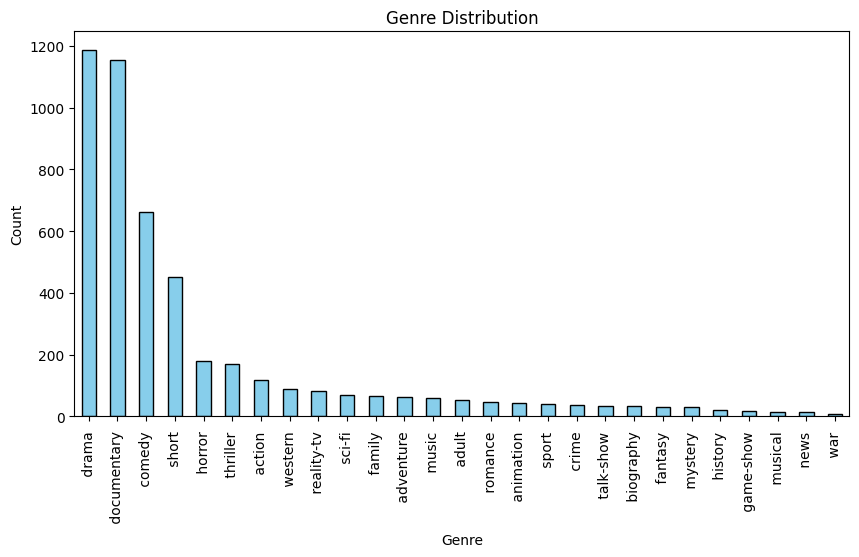

In [ ]:
plt.figure(figsize=(10,5))
train_data['GENRE'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Distribution')
plt.show()

In [ ]:
X_test = test_data['DESCRIPTION'].apply(preprocess_text)

In [ ]:
print(y_train)

[ 8 24  1 ... 23  5  7]


In [ ]:
X_train.isnull().sum()

0

In [ ]:
train_data['GENRE'].unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [ ]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

VECTORIZING THE TRAINING DATA

In [ ]:
# ========================= TF-IDF & COUNT VECTORIZATION =========================
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))  # Removed max_features limit
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 3))

In [ ]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_split)
X_val_tfidf = tfidf_vectorizer.transform(X_val_split)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

X_train_count = count_vectorizer.fit_transform(X_train_split)
X_val_count = count_vectorizer.transform(X_val_split)
X_test_count = count_vectorizer.transform(X_test)

In [ ]:

# Support Vector Machine (SVM) model
svm_model = LinearSVC(max_iter=10000, class_weight='balanced')  # Added class_weight to handle imbalance
svm_model.fit(X_train_tfidf, y_train_split)

LinearSVC(class_weight='balanced', max_iter=10000)

In [ ]:
# Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vect, y_train_split)


MultinomialNB()

In [ ]:
# Logistic Regression model
lr_model = LogisticRegression(max_iter=10000, solver='saga', class_weight ='balanced')
lr_model.fit(X_train_vect, y_train_split)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=10000, solver='saga')

In [ ]:
y_pred_svm = svm_model.predict(X_val_vect)
y_pred_nb = nb_model.predict(X_val_vect)
y_pred_lr = lr_model.predict(X_val_vect)

In [ ]:
print("SVM Model Performance:\n", classification_report(y_val_split, y_pred_svm))
print("Naive Bayes Model Performance:\n", classification_report(y_val_split, y_pred_nb))
print("Logistic Regression Model Performance:\n", classification_report(y_val_split, y_pred_lr))

SVM Model Performance:
               precision    recall  f1-score   support

           0       0.50      0.09      0.16        32
           1       0.80      0.27      0.40        15
           2       0.25      0.09      0.13        11
           3       0.50      0.17      0.25         6
           4       0.00      0.00      0.00         9
           5       0.47      0.44      0.46       176
           6       0.00      0.00      0.00         6
           7       0.58      0.80      0.67       289
           8       0.45      0.69      0.54       286
           9       0.20      0.06      0.10        16
          10       0.00      0.00      0.00         5
          11       1.00      0.22      0.36         9
          12       0.00      0.00      0.00         4
          13       0.56      0.29      0.38        48
          14       0.00      0.00      0.00         9
          15       0.00      0.00      0.00         3
          16       1.00      0.20      0.33         5
   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

In [ ]:
svm_acc = accuracy_score(y_val_split, y_pred_svm)
nb_acc = accuracy_score(y_val_split, y_pred_nb)
lr_acc = accuracy_score(y_val_split, y_pred_lr)

print(f"SVM Accuracy: {svm_acc:.2f}")
print(f"Naive Bayes Accuracy: {nb_acc:.2f}")
print(f"Logistic Regression Accuracy: {lr_acc:.2f}")

SVM Accuracy: 0.49
Naive Bayes Accuracy: 0.44
Logistic Regression Accuracy: 0.47


<Figure size 1200x600 with 0 Axes>

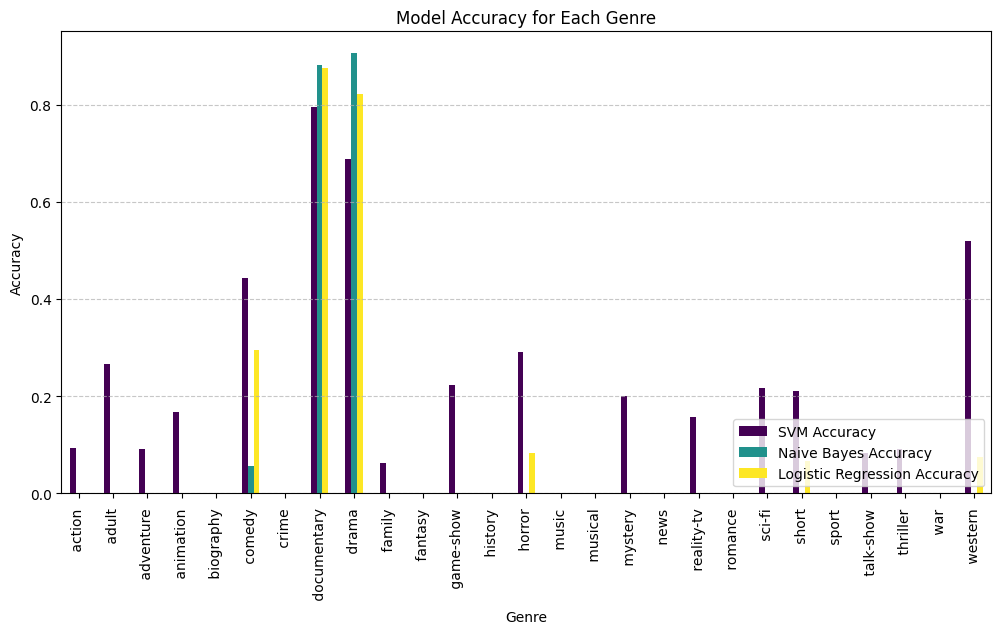

In [ ]:
import seaborn as sns

# Compute accuracy per genre
unique_labels = np.unique(y_val_split)
accuracy_per_genre = {
    "Genre": [],
    "SVM Accuracy": [],
    "Naive Bayes Accuracy": [],
    "Logistic Regression Accuracy": []
}

for genre in unique_labels:
    genre_mask = y_val_split == genre
    accuracy_per_genre["Genre"].append(label_encoder.inverse_transform([genre])[0])
    accuracy_per_genre["SVM Accuracy"].append(accuracy_score(y_val_split[genre_mask], y_pred_svm[genre_mask]))
    accuracy_per_genre["Naive Bayes Accuracy"].append(accuracy_score(y_val_split[genre_mask], y_pred_nb[genre_mask]))
    accuracy_per_genre["Logistic Regression Accuracy"].append(accuracy_score(y_val_split[genre_mask], y_pred_lr[genre_mask]))

df_accuracy = pd.DataFrame(accuracy_per_genre)

# Bar Plot
plt.figure(figsize=(12, 6))
df_accuracy.set_index("Genre").plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.ylabel("Accuracy")
plt.title("Model Accuracy for Each Genre")
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



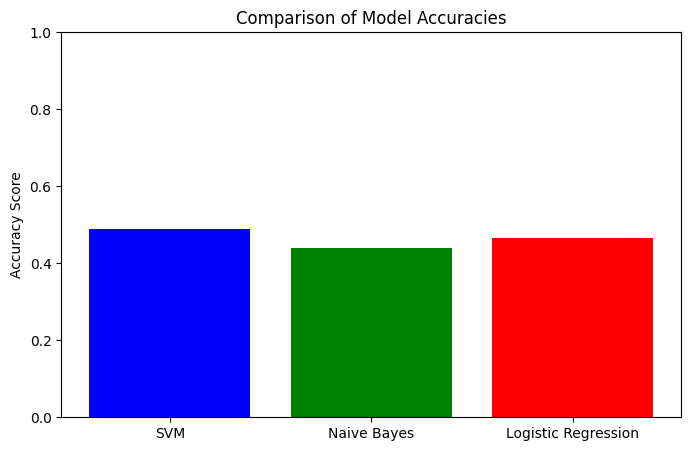

In [ ]:
models = ['SVM', 'Naive Bayes', 'Logistic Regression']
accuracies = [svm_acc, nb_acc, lr_acc]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Accuracy range is 0 to 1
plt.show()